In [1]:
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# with data visualization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px

In [3]:
# Load the data from the CSV file
data = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Mental-Health-Twitter.csv")

# Check the first few rows of the data
print("")
print("\033[1mTable content:-\n\033[0m")
print(data.head(),"\n")

# stats Summarty the data
print("")
print("\033[1mSatistical Summary of Data:-\n\033[0m")
print(data.describe,"\n")

# info about data
print("")
print("\033[1mInformation abot data:-\n\033[0m")
print(data.info,"\n")

# Check for missing values
print("")
print("\033[1mSum of all null values:-\n\033[0m")
print(data.isnull().sum(),"\n")



Table content:-

   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  Awake but tired. I need to sleep but my brain ...  1013187241         84   
3  RT @SewHQ: #Retro bears make perfect gifts and...  1013187241         84   
4  It’s hard to say whether packing lists are mak...  1013187241         84   

   friends  favourites  statuses  retweets  label  
0      211         251       837        

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1981
           1       0.88      0.88      0.88      2019

    accuracy                           0.88      4000
   macro avg       0.88      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



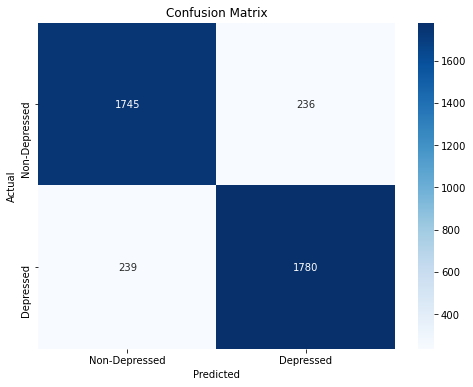

In [4]:

data_df = pd.DataFrame({'text': data['post_text'], 'label': data['label']})

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data['post_text'], data['label'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, train_labels)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(test_labels, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Depressed', 'Depressed'], yticklabels=['Non-Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotly Bar Chart for Class Distribution
class_distribution = data_df['label'].value_counts().reset_index()
class_distribution.columns = ['Label', 'Count']
fig = px.bar(class_distribution, x='Label', y='Count', color='Label', title='Class Distribution')
fig.show()

In [5]:
pip install  plotly

Note: you may need to restart the kernel to use updated packages.
